# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/boston_data.csv')

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
data.shape

(404, 14)

In [5]:
# checking for missing values

null_cols = data.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

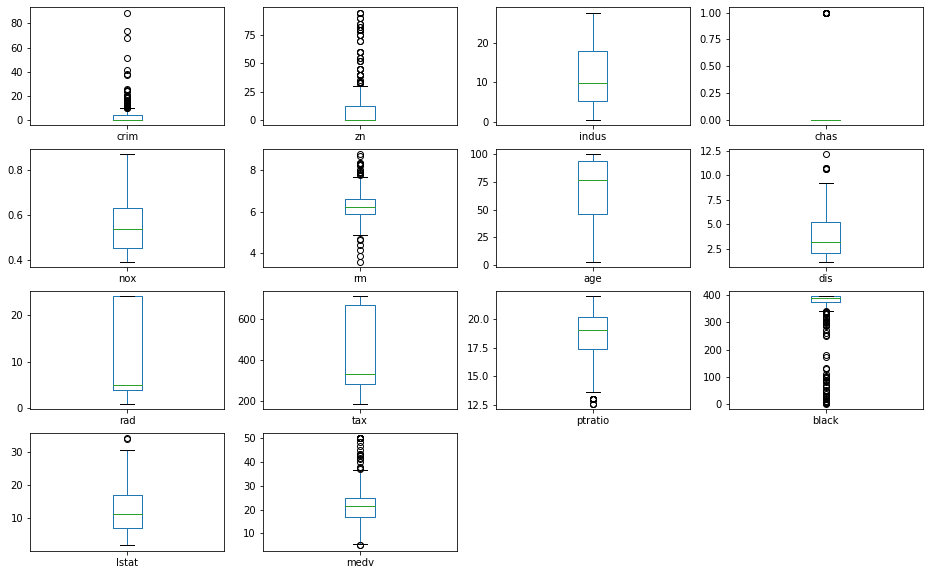

In [6]:
# checking for outliers

data.plot(kind='box', subplots=True, layout=(4,4), figsize=(16,10), sharex=False, sharey=False)
plt.show()

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

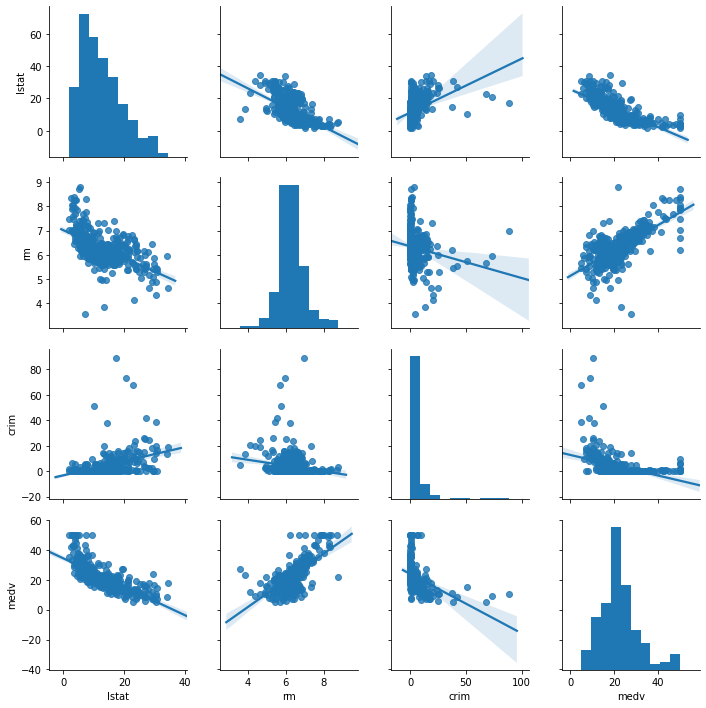

In [7]:
data_correlation = data[['lstat', 'rm', 'crim','medv']]

sns.pairplot(data_correlation, kind="reg")

In [8]:
print("Correlation between medv and lstat:", data['medv'].corr(data['lstat']))
print("Correlation between medv and rm:", data['medv'].corr(data['rm']))
print("Correlation between medv and crim:", data['medv'].corr(data['crim']))

Correlation between medv and lstat: -0.7426954940642155
Correlation between medv and rm: 0.6835409939262139
Correlation between medv and crim: -0.4009558757372438


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [9]:
"""
Strong correlation between the value of the houses and the lstat variable which makes sense because the 
higher the 'lower status' the lower will be the value of the house

Strong correlation between the value of the houses and the rm variable which makes sense because the 
higher the average number of rooms per dwelling, the higher will be the value of the house

Negative correlation between the value of the houses and the crim variable which makes sense because the 
higher the per capita crime rate by town, the lower will be the value of the house

"""

"\nStrong correlation between the value of the houses and the lstat variable which makes sense because the \nhigher the 'lower status' the lower will be the value of the house\n\nStrong correlation between the value of the houses and the rm variable which makes sense because the \nhigher the average number of rooms per dwelling, the higher will be the value of the house\n\nNegative correlation between the value of the houses and the crim variable which makes sense because the \nhigher the per capita crime rate by town, the lower will be the value of the house\n\n"

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

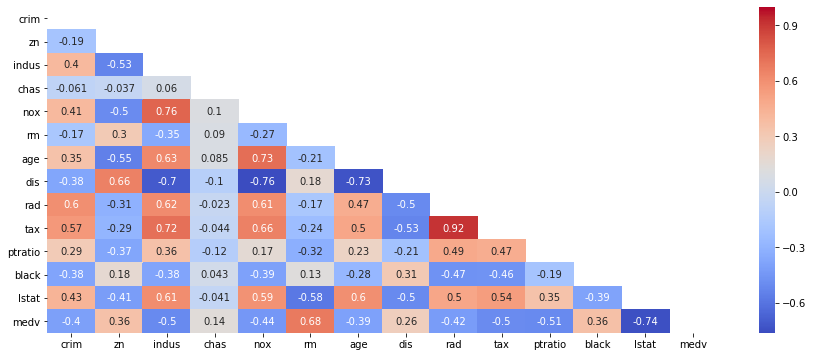

In [10]:
corr_matrix = data.corr()

plt.figure(figsize=(15,6))
mask = np.triu(corr_matrix)

heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

heatmap

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [11]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [12]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    return r2_score(y_true, y_predict)
    

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [13]:
from sklearn.model_selection import train_test_split

y = data['medv']
X = data[data.columns.difference(['medv'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(323, 13) (81, 13) (323,) (81,)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [14]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor

depths = [1, 2, 4, 6, 8, 10]
RFR = {}
output = []
for i, d in enumerate(depths):
    RFR[i] = RandomForestRegressor(n_estimators = 100, max_depth = d)
    RFR[i].fit(X_train, y_train)
    output.append(RFR[i])

Now, plot the score for each tree on the training set and on the testing set.

In [15]:
# Produce a plot with the score for the testing and training for the different max depths

labels = [r.max_depth for r in output]
y_pred_train = [performance_metric(y_train,r.predict(X_train)) for r in output]
y_pred_test = [performance_metric(y_test,r.predict(X_test)) for r in output]

In [16]:
y_pred_train

[0.5961092273194377,
 0.7953914651117139,
 0.9167642495032624,
 0.9580375653492096,
 0.9710210217729014,
 0.9781508319157811]

In [17]:
y_pred_test

[0.48282878256564743,
 0.5768104992044731,
 0.6852583730782543,
 0.7574216015215234,
 0.7526927614047534,
 0.7623064651950979]

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [18]:
# the deeper forest, the higher accurancy

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [19]:
# the model suffers from high Variance when max_depth = 1
# the model suffers from Low Variance when max_depth = 10 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [20]:
#  max_depth parameter that you think would optimize the model is 8

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [21]:
# Your response here